In [1]:
from pathlib import Path
Path.cwd()

PosixPath('/home/sjcashen/python-projects/legume')

In [2]:
import chickpea
import numpy as np
import legume
import matplotlib.pyplot as plt

%load_ext memory_profiler
import time

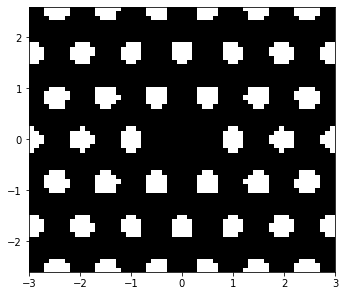

In [3]:
N=30

thickness = 0.4355
D=thickness
radius=0.234
eps = 2.21**2

pcc = chickpea.PhotonicCrystalCavity('H', supercell_size=(6,6),
                                       radius=radius,
                                       thickness= thickness,
                                       eps=eps, n=1)

phc = pcc.cavity()

eps_dist=legume.viz.eps_xy(phc, Nx=2*N, Ny=2*N)

lattice = phc.lattice
phc2= legume.PhotCryst(lattice)
phc2.add_layer(d=thickness, layer_type='freeform')

phc2.initialize_ff_layer(eps_dist)

In [4]:
gme = legume.GuidedModeExp(phc, mode='grid',res=eps_dist.shape)
gme2=legume.GuidedModeExp(phc2, mode='grid', res=eps_dist.shape)
gme3=legume.GuidedModeExp(phc, gmax=7)

In [5]:
eps_1=np.real_if_close(gme.get_eps_xy(z=D/2, Nx=2*N,Ny=2*N)[0])
eps_2=np.real_if_close(gme2.get_eps_xy(z=D/2, Nx=2*N,Ny=2*N)[0])

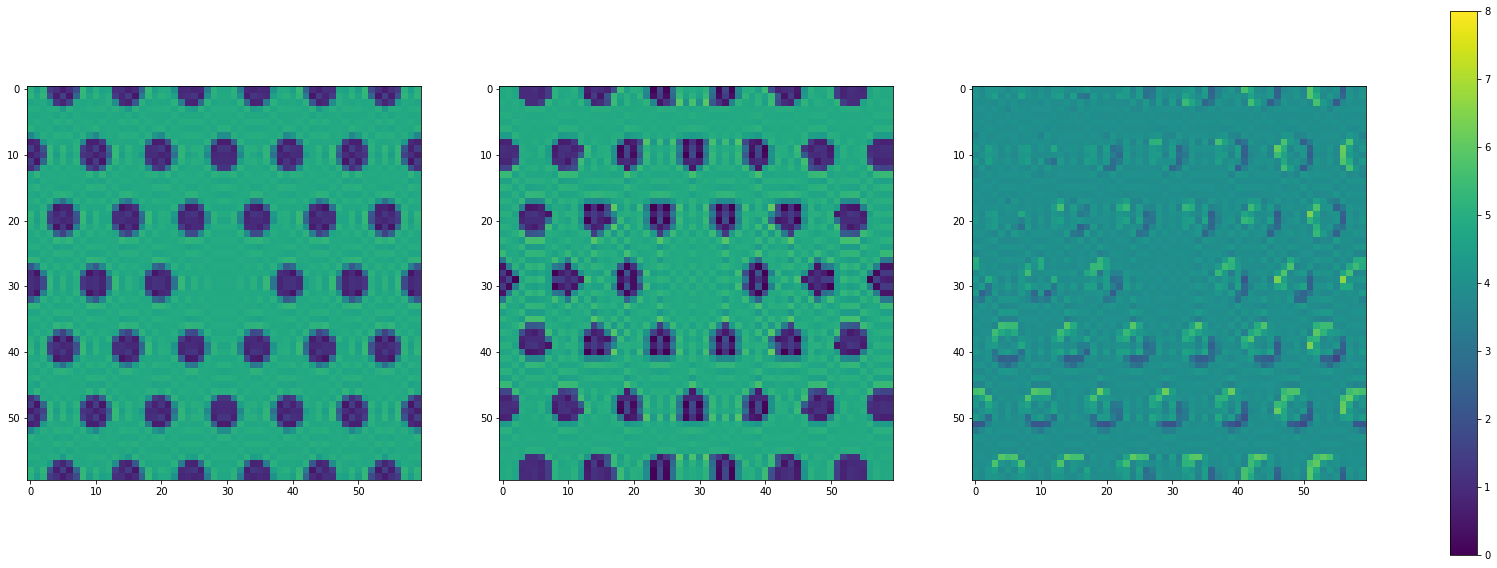

In [6]:
shift=N
fig, ax = plt.subplots(1,3,figsize=(30,10))



pos1=ax[0].imshow(eps_1, vmin=0, vmax=8)
pos2=ax[1].imshow(eps_2, vmin=0, vmax=8)
pos3=ax[2].imshow(eps_1-eps_2, vmin=-8, vmax=8)

fig.colorbar(pos1, ax=ax.ravel().tolist())
fig.show()

In [7]:
options = {'verbose': True,
           'gmode_inds': [0], # This is a TE band gap and we assume that there are no higher order modes.
           'gradients': 'approx', # We don't need exact gradients at this time.
           'numeig': 1, # We happen to know this is a good number to fill the band gap.
                         # Run with higher value until you save modes outside of the band gap.
           'eig_solver': 'eigsh',
           'eig_sigma': 0.416, # We target the center of the band gap
           'compute_im': True # We only want to calculate the loss rates for cavity modes.
           }

In [8]:
legume.set_backend("jax")
start = time.time()
gme3.run(**options)
end = time.time()
print("Elapsed (after compilation) = %s" % (end - start))

/usr/local/lib/python3.8/dist-packages/jax/_src/numpy/lax_numpy.py:2929: UserWarning: Explicitly requested dtype <class 'numpy.float64'> requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "array")
/usr/local/lib/python3.8/dist-packages/jax/_src/numpy/lax_numpy.py:2929: UserWarning: Explicitly requested dtype <class 'numpy.complex128'> requested in array is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "array")


Running k-point 1 of 1

KeyboardInterrupt: 

In [ ]:
start = time.time()
gme3.run(**options)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))